In [3]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
from datetime import timedelta

In [166]:
ds = xr.open_dataset("../prism/prism_regrid_bilinear_wshed/PRISM_precip_wsub_WY2019.nc")

In [167]:
#hourly_prism_precip = (ds.DailyPrcp/24.).resample({"time":"h"}).backfill()

In [168]:
base = pl.Path("/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/PrismForce/WY2019/")

# loop thru the nc files...
for f in base.glob("*.nc"):
    # open up the file...
    target_ds = xr.open_dataset(f)
        
    # get dates
    sd = pd.to_datetime(target_ds.XTIME[0].values)
    ed = pd.to_datetime(target_ds.XTIME[-1].values) + timedelta(days=1)
    
        
    # change stuff
    hourly_prism_precip = (ds.sel(time=slice(sd,ed))/24.).resample({"time":"h"}).backfill().DailyPrcp
    accprcp_prism = hourly_prism_precip.sel(time=slice(sd,ed)).cumsum(dim='time')
    
    # update
    # just do this because PRISM ends at the right time... tehre is an extra day in the wrf dataset
    if (ed == pd.to_datetime("2019-10-01 23:00:00")):
        target_ds.ACCPRCP.values[:696,:,:] = accprcp_prism.values[:-1,:,:]
    else:
        target_ds.ACCPRCP.values[:,:,:] = accprcp_prism.values[:-1,:,:]
        
    # write out some new files
    target_ds.to_netcdf(base.joinpath(f.name.split(".")[0]+"_prism_precip.nc"))

In [1]:
ls -lrt /home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/PrismForce/WY2019/Month01_SfcMet_wsub_WY2019_prism_precip.nc

total 6043080
-rw-rw-r-- 1 wrudisill wrudisill 262773265 Oct 13 15:24 Month01_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 237374065 Oct 13 15:24 Month02_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 262773265 Oct 13 15:24 Month03_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 254319409 Oct 13 15:24 Month04_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 262773265 Oct 13 15:24 Month05_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 254319409 Oct 13 15:24 Month06_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 262773265 Oct 13 15:24 Month07_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 262773265 Oct 13 15:24 Month08_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 254319409 Oct 13 15:24 Month09_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 262773265 Oct 13 15:24 Month12_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 254319409 Oct 13 15:24 Month11_SfcMet_wsub_WY2019.nc
-rw-rw-r-- 1 wrudisill wrudisill 2627732

In [9]:
ds = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/PrismForce/WY2019/Month02_SfcMet_wsub_WY2019_prism_precip.nc")

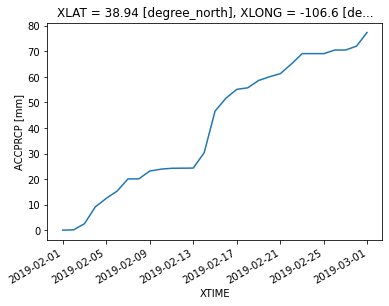

In [10]:
ds.ACCPRCP.isel(south_north=50, west_east=50).plot()